In [165]:
# prompt: import main lib for machine learning

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import os

**Import the data from the excel file**

In [166]:
df = pd.read_excel('dataset1.xlsx')

In [167]:
df.sample(5)

,target,var1,var2,var3,var4,var5,var6,var7
629,1,272.80,310.929,Serbia,NaN,233.85,no,2019-03-23 06:00:15
352,0,500.70,612.752,Saint Lucia,NaN,360.95,no,2019-05-19 11:16:59
492,1,316.44,367.824,Kenya,NaN,185.00,no,2019-03-24 06:36:52
148,0,388.46,733.923,Rwanda,117.0,398.00,yes,2019-04-22 07:48:33
79,1,255.30,676.823,Netherlands,129.0,276.60,yes,2019-03-18 09:08:39


Get describtion of the data set

# Discover the dataset

In [168]:
df.describe()

,target,var1,var2,var4,var5
count,925.000000,925.000000,925.000000,325.000000,925.000000
mean,0.496216,360.116562,548.390134,108.452308,325.393946
std,0.500256,87.866662,135.221460,26.325744,78.862779
min,0.000000,209.560000,139.965000,57.000000,163.000000
25%,0.000000,278.640000,467.373000,87.000000,257.900000
50%,0.000000,367.640000,569.841000,105.000000,342.350000
75%,1.000000,437.600000,652.278000,126.000000,393.000000
max,1.000000,539.920000,794.848000,180.000000,457.150000


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  925 non-null    int64  
 1   var1    925 non-null    float64
 2   var2    925 non-null    float64
 3   var3    925 non-null    object 
 4   var4    325 non-null    float64
 5   var5    925 non-null    float64
 6   var6    925 non-null    object 
 7   var7    925 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 57.9+ KB


the **var 4** contains 925-325 =600 record as nulls

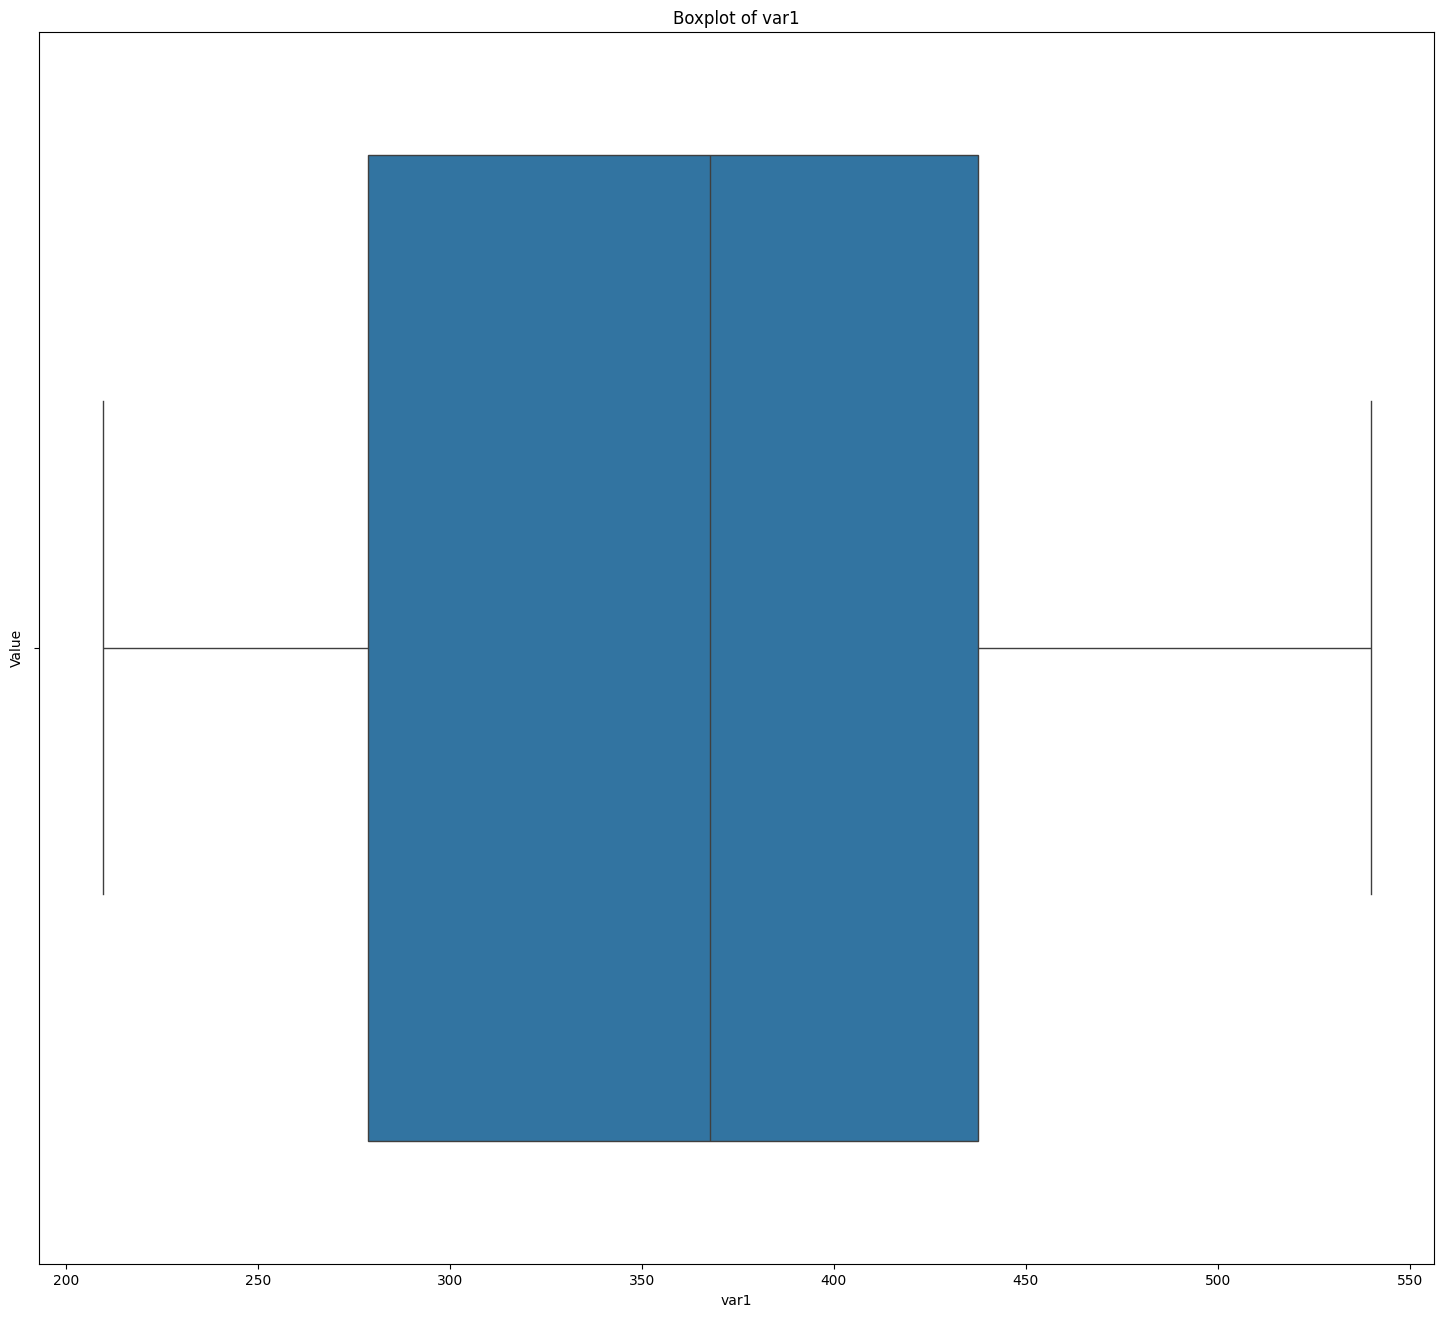

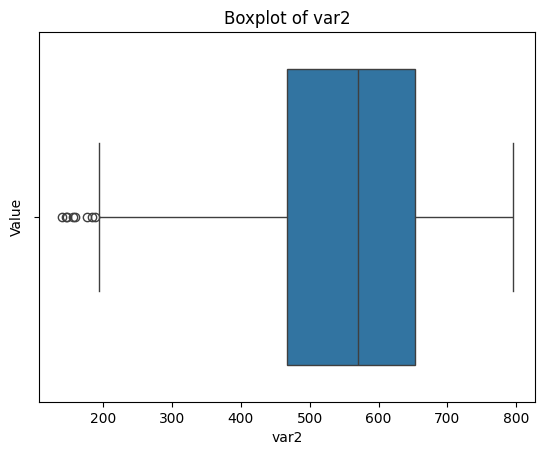

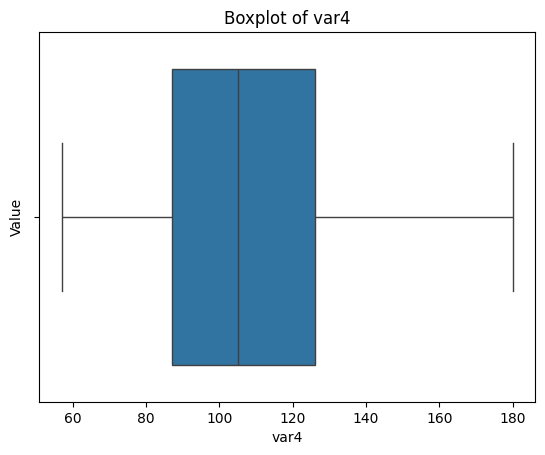

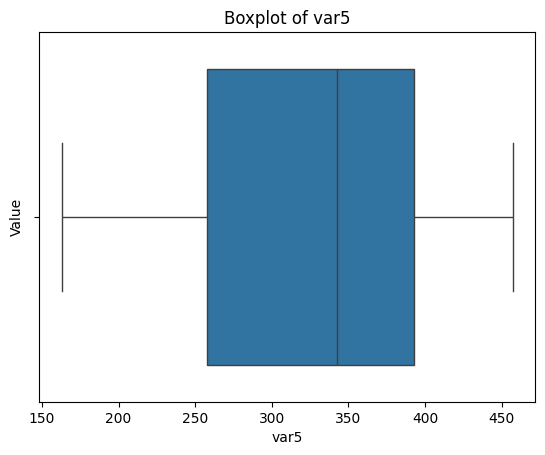

In [170]:
# prompt: draw boxplot for all column that are numbers to detect the outliers exclude the target

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = [col for col in numeric_columns if col != 'target']
plt.figure(figsize=(18, 16))

for col in numeric_columns:
    sns.boxplot(x=df[col])
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.title(f'Boxplot of {col}')
    plt.show()


# Data Preprocessing

Discover the values of var4

<Axes: xlabel='var4'>

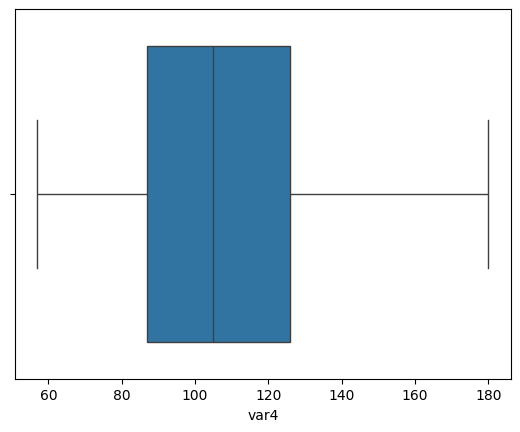

In [171]:
#generate boxplot for var 4

sns.boxplot(x=df['var4'])


[138.  81.  90. 102. 105. 111.  78. 129. 147.  69.  87. 114.  75. 132.
  93.  99. 108. 126. 135.  63. 159. 117.  96. 162. 174.  84. 123. 156.
 150.  66. 168. 171. 141.  72. 153.  60. 177.  57. 120. 144. 180.  nan]
var4
87.0     19
114.0    17
93.0     17
96.0     15
117.0    15
99.0     14
105.0    13
135.0    13
132.0    13
102.0    12
90.0     12
75.0     11
84.0     11
123.0    10
126.0    10
81.0     10
111.0    10
78.0      9
129.0     9
120.0     8
108.0     8
156.0     7
138.0     7
72.0      7
69.0      6
147.0     5
162.0     4
63.0      4
153.0     4
144.0     3
60.0      3
159.0     3
150.0     3
174.0     3
141.0     2
66.0      2
57.0      2
171.0     1
168.0     1
177.0     1
180.0     1
Name: count, dtype: int64


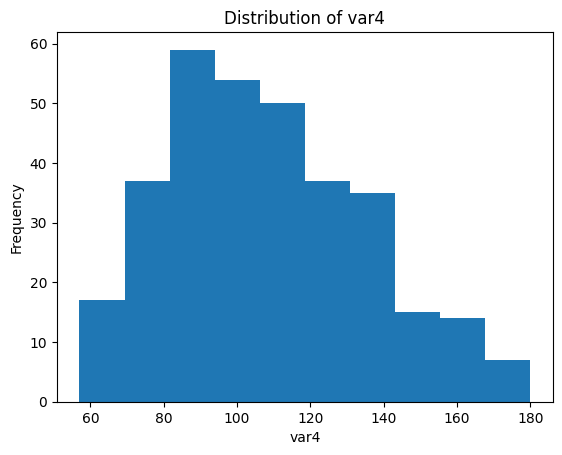

In [172]:
#discover the patter of var4 how the values look like

# Check the unique values in var4
unique_values = df['var4'].unique()
print(unique_values)

# Check the frequency of each unique value
value_counts = df['var4'].value_counts()
print(value_counts)

# Plot the distribution of var4
plt.hist(df['var4'], bins=10)
plt.xlabel('var4')
plt.ylabel('Frequency')
plt.title('Distribution of var4')
plt.show()


if possible to choose the mean of the the missing var4

In [173]:
#choose the mean of the the missing var4

#mean_value = df['var4'].mean()
#df['var4'] = df['var4'].fillna(mean_value)

df['var4'].interpolate(method='linear', inplace=True)


#from sklearn.impute import KNNImputer

#imputer = KNNImputer(n_neighbors=5)
#df['var4'] = imputer.fit_transform(df[['var4']])

#from sklearn.experimental import enable_iterative_imputer  # noqa
#from sklearn.impute import IterativeImputer

#imputer = IterativeImputer(max_iter=10, random_state=0)
#df['var4'] = imputer.fit_transform(df[['var4']])


<Axes: xlabel='var4'>

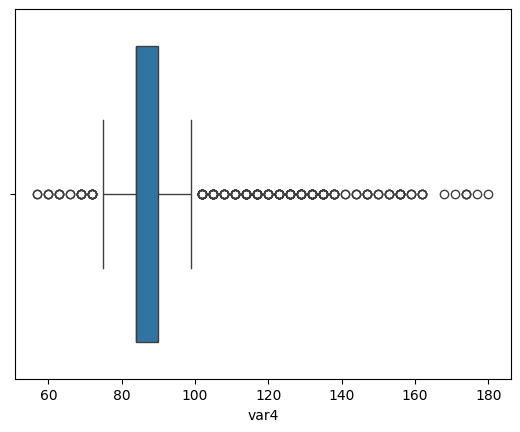

In [174]:
# review the outliers for v4 again
sns.boxplot(x=df['var4'])


## Encode the category columns

In [124]:
print(df.columns)

# One-Hot Encoded for var3
df = pd.get_dummies(df, columns=['var3', 'var6'], drop_first=False)
#print(encoded_df.columns)

#df = df.drop(columns=['var3', 'var6'])

#updated_df = pd.concat([df, encoded_df], axis=1)


Index(['target', 'var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7'], dtype='object')
Index(['target', 'var1', 'var2', 'var4', 'var5', 'var7', 'var3_Afghanistan',
       'var3_Albania', 'var3_Algeria', 'var3_American Samoa',
       ...
       'var3_Vanuatu', 'var3_Venezuela', 'var3_Vietnam',
       'var3_Wallis and Futuna', 'var3_Western Sahara', 'var3_Yemen',
       'var3_Zambia', 'var3_Zimbabwe', 'var6_no', 'var6_yes'],
      dtype='object', length=244)


In [125]:
encoded_df.sample(5)

,target,var1,var2,var4,var5,var7,var3_Afghanistan,var3_Albania,var3_Algeria,var3_American Samoa,...,var3_Vanuatu,var3_Venezuela,var3_Vietnam,var3_Wallis and Futuna,var3_Western Sahara,var3_Yemen,var3_Zambia,var3_Zimbabwe,var6_no,var6_yes
338,1,261.66,633.369,108.452308,387.80,2019-05-19 03:52:24,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
543,1,365.30,519.205,108.452308,456.85,2019-04-01 07:37:18,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
238,1,311.60,762.470,129.000000,336.40,2019-04-03 21:13:46,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
763,0,338.20,586.388,108.452308,444.10,2019-01-30 00:05:37,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
858,1,229.38,335.539,108.452308,308.80,2019-05-27 08:53:51,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [126]:
# prompt: get columns types of updated_df

updated_df.dtypes


target             int64
var1             float64
var2             float64
var3              object
var4             float64
                  ...   
var3_Yemen          bool
var3_Zambia         bool
var3_Zimbabwe       bool
var6_no             bool
var6_yes            bool
Length: 252, dtype: object

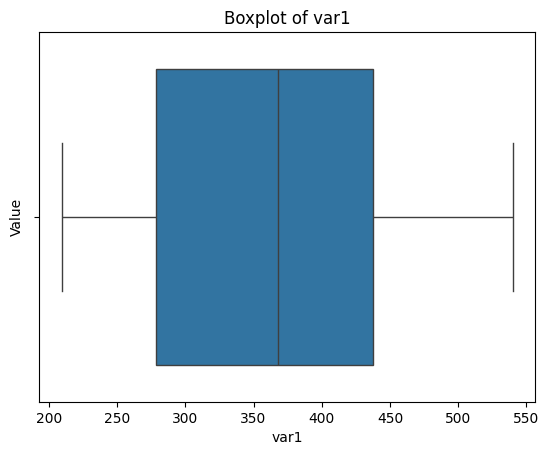

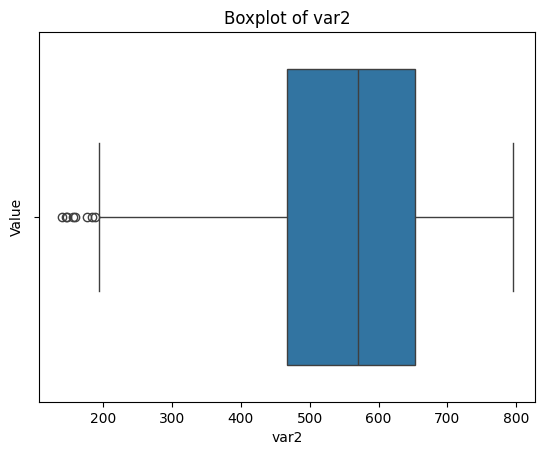

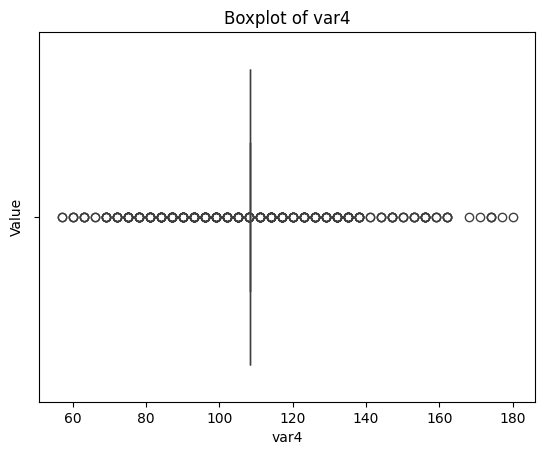

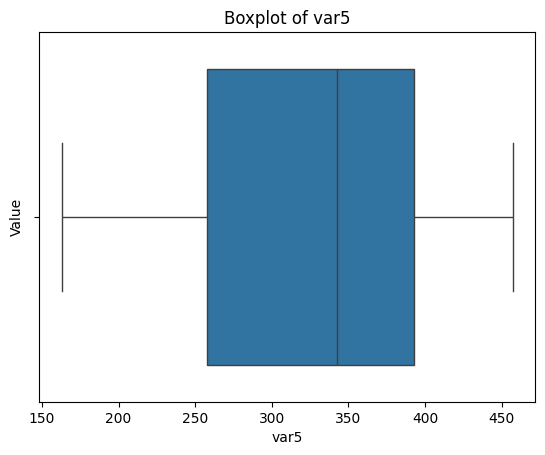

In [130]:
# prompt: draw boxplot for all column that are numbers to detect the outliers exclude the target

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = [col for col in numeric_columns if col != 'target']

for col in numeric_columns:
    sns.boxplot(x=df[col])
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.title(f'Boxplot of {col}')
    plt.show()
